# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [6]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K
T=1073.15          #
k_fwd_star = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])


### Add some calculations to the following code block:

In [7]:
# Loop over these delta phi = phi_anode - phi_elyte values:
delta_phi = np.linspace(-0.9,0.05,100)
i_elementary = np.zeros_like(delta_phi)

delta_g_o=((g_Vac_elyte_o+g_Vac_Ni_o+g_H2O_Ni_o)-(2*g_H_Ni_o+g_Ox_elyte_o))
delta_g_rxn=delta_g_o+(R*T*log((X_Vac_elyte*X_H2O_Ni*X_Vac_Ni)/(X_Ox_elyte*X_H_Ni**2)))
c_term=((X_Vac_elyte*X_H2O_Ni*X_Vac_Ni)/(X_Ox_elyte*X_H_Ni**2))
k_rev_star=k_fwd_star/(exp(-delta_g_rxn/(R*T))*c_term)
beta=0.5
n=-2

for ind, E in enumerate(delta_phi):
    k_fwd=k_fwd_star*exp((-beta*n*F*delta_phi[ind])/(R*T))
    k_rev=k_rev_star*exp(((1-beta)*n*F*delta_phi[ind])/(R*T))
    i_elementary[ind] = n*F*(k_fwd*((C_elyte*X_Ox_elyte)*(C_Ni_s*X_H_Ni)**2)-k_rev*((C_elyte*X_Vac_elyte)*(C_Ni_s*X_H2O_Ni*X_Vac_Ni*C_Ni_s)))

Plot the results:

Text(0, 0.5, 'Current [A/m2]')

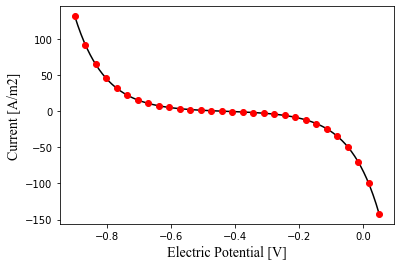

In [8]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

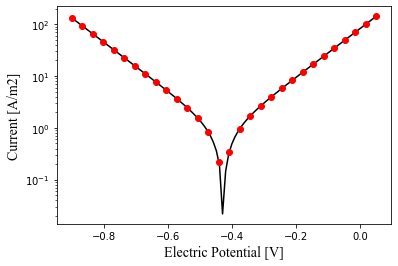

In [9]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:
The plots do make sense based on the theory of mass-action kinetics. The area-normalized current is at its lowest value at the equilibrium potential of the cell. At the equilibrium potential, there is no driving force in either the positive or negative direction to drive current that way. At the farthest points from the equilibrium potential, the current is the greatest because the driving forces are the greater the farther the cell is from equilibrium. The plots match the validation data.


## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [10]:
i_BV = np.zeros_like(delta_phi)
i_o=n*F*(k_fwd_star**(1-beta))*(k_rev_star**beta)*(((C_elyte*X_Ox_elyte)*(C_Ni_s*X_H_Ni)**2)**(1-beta))*((C_elyte*X_Vac_elyte)*(C_Ni_s*X_H2O_Ni*X_Vac_Ni*C_Ni_s))**beta
for ind, E in enumerate(delta_phi):
    eta=delta_phi[ind]-(-delta_g_rxn/(n*F))
    i_BV[ind] = i_o*(exp((-beta*n*F*eta)/(R*T))-exp(((1-beta)*n*F*eta)/(R*T)))

#### Let's plot the BV and Marcus currents together:

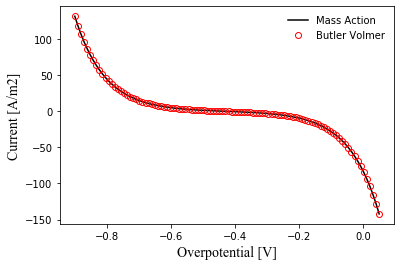

In [11]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

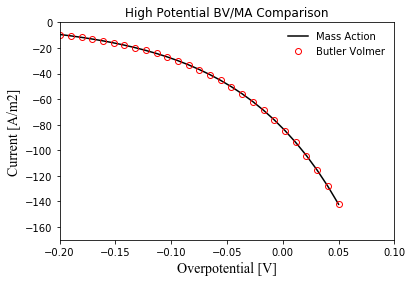

In [21]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.title('High Potential BV/MA Comparison')
plt.xlim((-0.2,0.1))
plt.ylim((-170,0))
plt.show()

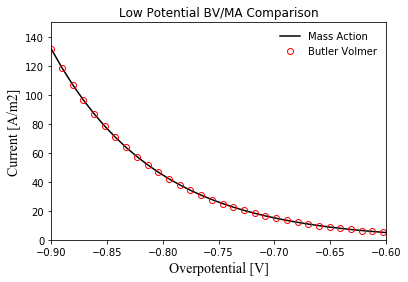

In [20]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.title('Low Potential BV/MA Comparison')
plt.xlim((-0.9,-0.6))
plt.ylim((0,150))
plt.show()

#### Discussion:
The match of the currents estimated by Butler-Volmer and mass-action kinetics are excellent. I plotted the same results but zoomed in on the highest and lowest potentials. Because of the assumption of constant i_o and thus constant concentrations and site densities,the Butler-Volmer equation may not be able to properly consider concentration polarization  in the cell, which would typically occur at potentials of the greatest magnitude. The assumption of a constant i_o is not a good assumption in situations where the fuel cell is pushed to its limits, such as in fast-charging or discharging situations or in circumstances where the fuel cell must be ramped up very quickly to meet a high power demand.


### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [12]:
i_Tafel = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    eta=delta_phi[ind]-(-delta_g_rxn/(n*F))
    i_Tafel[ind] =-i_o*exp((beta*n*F*eta)/(R*T))

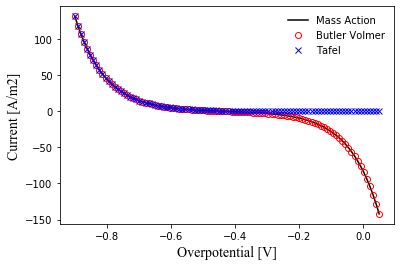

In [13]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Disucssion: 
What do you notice, from these results?  What from the theory can explain what you sese.

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.

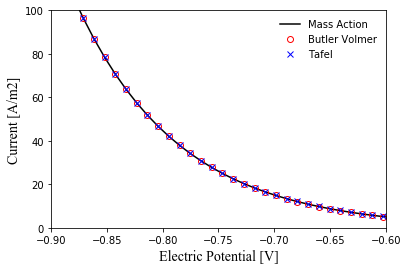

In [22]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.9,-0.6))
plt.ylim((0,100))
plt.show()

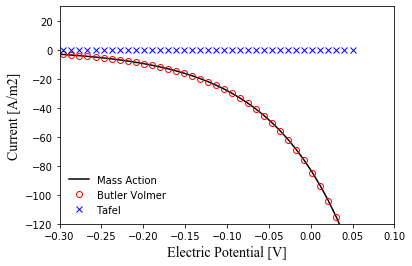

In [24]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.3,0.1))
plt.ylim((-120,30))
plt.show()

#### Discussion:
The Tafel approximation is very effective at the lowest potentials on the plot, which are the highest overpotentials. The Tafel approximation assumes that the reaction rate in the electrode is much slower than the mass transfer in the electrode. When the overpotential is large, the rate of the chemical reaction will be slower, so the Tafel approximation is most valid for reactions with high overpotentials. As the potential changes and gets closer to zero, the Tafel approximation is no longer valid for estimating the current in the cell. The Tafel approximation should be used with caution when approximating current values in fuel cells. 
